In [80]:
# Import dependencies
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import requests
import random
import scipy.stats as st
import gmaps

from config import google_key

# Dallas

In [2]:
# import yelp city csv & read into dataframe
dallas_yelp_path = "./Output/Data/dallas_restaurants.csv"
dallas_yelp = pd.read_csv(dallas_yelp_path)
dallas_yelp

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Jia Modern Chinese & Asian Lounge,Dallas,32.864950,-96.804740,75225,chinese,$$,4.0
1,Szechuan Chinese Restaurant,Dallas,32.818150,-96.813430,75219,chinese,$,4.0
2,Sum Dang Good Chinese,Dallas,32.779323,-96.828615,75212,chinese,NaN,4.0
3,Hello Dumpling,Dallas,32.839650,-96.696860,75218,chinese,$$,4.5
4,Monkey King Noodle Company,Dallas,32.784737,-96.781062,75226,chinese,$$,3.5
...,...,...,...,...,...,...,...,...
1136,Taco Bell,Dallas,32.934204,-96.803799,75240,mexican,$,2.0
1137,Amigas Fast Food,Dallas,32.771835,-96.697858,75227,mexican,NaN,3.0
1138,CC Wing 'N' Taquria,Dallas,32.882860,-96.759070,75231,mexican,NaN,2.5
1139,Taco Bell,Dallas,32.909500,-96.856150,75229,mexican,$,1.5


In [74]:
dallas_ethnicity_sums = dallas_yelp["ethnicity"].value_counts()

In [96]:
ethnicity_colors=['red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'dodgerblue', 'blue', 'darkviolet', 'purple', 'magenta']

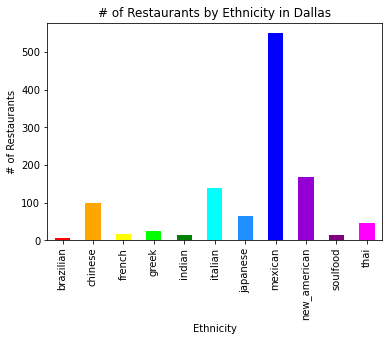

<Figure size 864x432 with 0 Axes>

In [136]:
ethnic_groups = dallas_yelp.groupby("ethnicity")
ethnic_counts = ethnic_groups['ethnicity'].count()

#my_cmap = cm.get_cmap('plasma')
dallas_ethnic_bar = ethnic_counts.plot(kind='bar', color=ethnicity_colors)
                                       #color=[plt.cm.plasma(np.arange(len(dallas_ethnicity_sums)))])
dallas_ethnic_bar.set_title("# of Restaurants by Ethnicity in Dallas")
dallas_ethnic_bar.set_xlabel("Ethnicity")
dallas_ethnic_bar.set_ylabel("# of Restaurants")
plt.savefig("./Output/Charts/DallasYelpBar.png")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [6]:
price_groups = dallas_yelp["price"].value_counts()
price_groups

$$      441
$       377
$$$      44
$$$$      5
Name: price, dtype: int64

In [9]:
# create new filtered df to drop any restaurants that have no price grade listed
dallas_price_df = pd.DataFrame(dallas_yelp.dropna(subset=['price']))
dallas_price_df['price_int'] = [len(price) for price in dallas_price_df['price']]
dallas_price_df

,name,city,latitude,longitude,zipcode,ethnicity,price,rating,price_int
0,Jia Modern Chinese & Asian Lounge,Dallas,32.864950,-96.804740,75225,chinese,$$,4.0,2
1,Szechuan Chinese Restaurant,Dallas,32.818150,-96.813430,75219,chinese,$,4.0,1
3,Hello Dumpling,Dallas,32.839650,-96.696860,75218,chinese,$$,4.5,2
4,Monkey King Noodle Company,Dallas,32.784737,-96.781062,75226,chinese,$$,3.5,2
6,Royal China,Dallas,32.896104,-96.802183,75230,chinese,$$,3.5,2
...,...,...,...,...,...,...,...,...,...
1133,Taco Bell,Dallas,32.909420,-96.767920,75243,mexican,$,2.0,1
1134,La Chiquita Taqueria,Dallas,32.763750,-96.700980,75227,mexican,$,2.0,1
1136,Taco Bell,Dallas,32.934204,-96.803799,75240,mexican,$,2.0,1
1139,Taco Bell,Dallas,32.909500,-96.856150,75229,mexican,$,1.5,1


In [131]:
dallas_ethnic_price = dallas_price_df.groupby("ethnicity")["price"].value_counts()
#dallas_ethnic_price

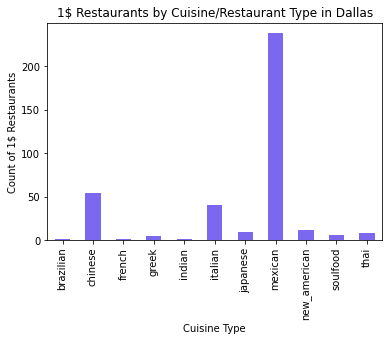

In [130]:
bar_plot = dallas_price_df[dallas_price_df["price_int"]==1].groupby("ethnicity").count()["price"].plot(kind='bar', color='mediumslateblue')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Cuisine Type")
bar_plot.set_title("1$ Restaurants by Cuisine/Restaurant Type in Dallas")
plt.savefig("./Output/Charts/Dallas_Ethnic_1$_Bar.png")

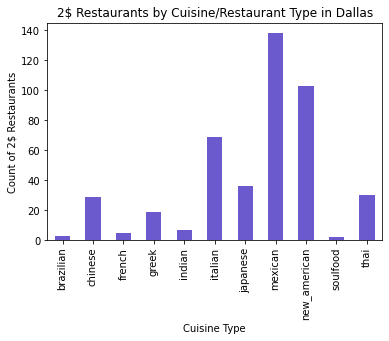

In [129]:
bar_plot2 = dallas_price_df[dallas_price_df["price_int"]==2].groupby("ethnicity").count()["price"].plot(kind='bar', color="slateblue")
bar_plot2.set_ylabel("Count of 2$ Restaurants")
bar_plot2.set_xlabel("Cuisine Type")
bar_plot2.set_title("2$ Restaurants by Cuisine/Restaurant Type in Dallas")
plt.savefig("./Output/Charts/Dallas_Ethnic_2$_Bar.png")

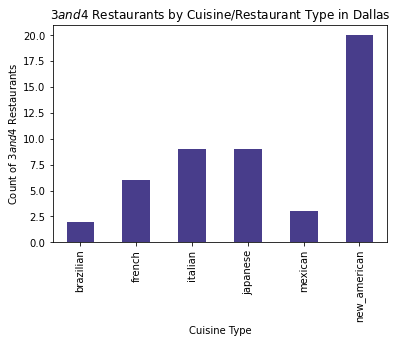

In [128]:
bar_plot3 = dallas_price_df[(dallas_price_df["price_int"]==3)|(dallas_price_df["price_int"]==4)].groupby("ethnicity").count()["price"].plot(kind='bar', color='darkslateblue')
bar_plot3.set_ylabel("Count of 3$ and 4$ Restaurants")
bar_plot3.set_xlabel("Cuisine Type")
bar_plot3.set_title("3$ and 4$ Restaurants by Cuisine/Restaurant Type in Dallas")
plt.savefig("./Output/Charts/Dallas_Ethnic_3$4$_Bar.png")

In [15]:
# bar_plot.set_xlabel("Ethnicity & Pricepoint")
# bar_plot.set_ylabel("Count")
# bar_plot.set_title("Breakdown of Restaurant Ethnicity by Pricepoint - Dallas")
# #plt.savefig("./Output/Charts/Dallas_Ethnicity_Price_Bar.png")
# plt.tight_layout()
# plt.show()

<Figure size 432x288 with 0 Axes>

In [114]:
dallas_rating_price = dallas_price_df.groupby("rating")["price"].value_counts()
#dallas_rating_price

In [60]:
# bar_plot = dallas_price_df.groupby("rating")["price_int"].value_counts().plot(kind='bar') 
# bar_plot.set_xlabel("Rating & Pricepoint")
# bar_plot.set_ylabel("Count")
# bar_plot.set_title("Breakdown of Restaurant Rating by Pricepoint - Dallas")
# #plt.savefig("./Output/Charts/Dallas_Rating_Price_Bar.png")
# plt.show()

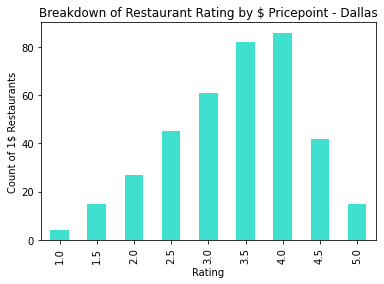

In [104]:
bar_plot = dallas_price_df[dallas_price_df["price_int"]==1].groupby("rating").count()["price"].plot(kind='bar', color='turquoise')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Rating")
bar_plot.set_title("Breakdown of Restaurant Rating by $ Pricepoint - Dallas")
plt.savefig("./Output/Charts/Dallas_Rating_1$_Bar.png")

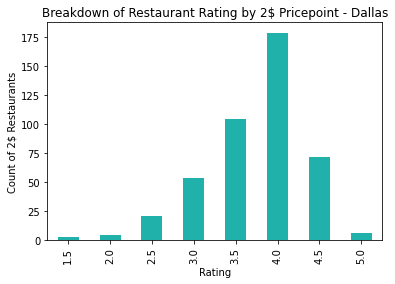

In [105]:
bar_plot = dallas_price_df[dallas_price_df["price_int"]==2].groupby("rating").count()["price"].plot(kind='bar', color='lightseagreen')
bar_plot.set_ylabel("Count of 2$ Restaurants")
bar_plot.set_xlabel("Rating")
bar_plot.set_title("Breakdown of Restaurant Rating by 2$ Pricepoint - Dallas")
plt.savefig("./Output/Charts/Dallas_Rating_2$_Bar.png")

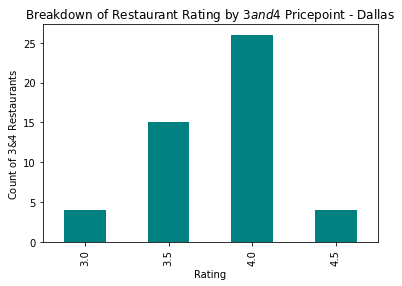

In [106]:
bar_plot3 = dallas_price_df[(dallas_price_df["price_int"]==3)|(dallas_price_df["price_int"]==4)].groupby("rating").count()["price"].plot(kind='bar', color='teal')
bar_plot3.set_ylabel("Count of 3$ & 4$ Restaurants")
bar_plot3.set_xlabel("Rating")
bar_plot3.set_title("Breakdown of Restaurant Rating by 3$ and 4$ Pricepoint - Dallas")
plt.savefig("./Output/Charts/Dallas_Rating_3$4$_Bar.png")

In [59]:
# Configure gmaps
gmaps.configure(api_key=google_key)

figure_layout = {
    'width': '600px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

# create variables for heatmap
locations = dallas_price_df[["latitude", "longitude"]]
price = dallas_price_df["price_int"].astype(float)
dallas_center = (32.779167, -96.808891)

fig = gmaps.figure(layout=figure_layout, center=dallas_center, zoom_level=5)

# create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=True, point_radius=10)

# add layer
fig.add_layer(heat_layer)

# display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='600px'))

# Seattle

In [19]:
# import yelp city csv & read into dataframe
seattle_yelp_path = "./Output/Data/seattle_restaurants.csv"
seattle_yelp = pd.read_csv(seattle_yelp_path)
seattle_yelp.head()

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,A + Hong Kong Kitchen,Seattle,47.598540,-122.326520,98104,chinese,$,4.0
1,Din Tai Fung,Seattle,47.612517,-122.335410,98101,chinese,$$,4.0
2,Harbor City Restaurant,Seattle,47.598210,-122.323390,98104,chinese,$$,4.0
3,Dough Zone,Seattle,47.597880,-122.327490,98104,chinese,$$,4.0
4,19 GOLD,Seattle,47.651839,-122.350314,98103,chinese,$$,4.5


In [20]:
seattle_ethnicity_sums = seattle_yelp["ethnicity"].value_counts()
seattle_ethnicity_sums

mexican         261
new_american    243
japanese        222
chinese         180
italian         160
thai            150
indian           57
greek            51
french           37
soulfood         12
brazilian         5
Name: ethnicity, dtype: int64

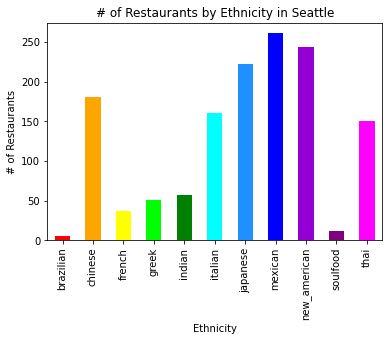

<Figure size 864x432 with 0 Axes>

In [138]:
ethnic_groups = seattle_yelp.groupby("ethnicity")
ethnic_counts = ethnic_groups['ethnicity'].count()
seattle_ethnic_bar = ethnic_counts.plot(kind='bar', color=ethnicity_colors)
seattle_ethnic_bar.set_title("# of Restaurants by Ethnicity in Seattle")
seattle_ethnic_bar.set_xlabel("Ethnicity")
seattle_ethnic_bar.set_ylabel("# of Restaurants")
plt.savefig("./Output/Charts/SeattleYelpBar.png")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [22]:
seattle_price_df = pd.DataFrame(seattle_yelp.dropna(subset=['price']))
seattle_price_df['price_int'] = [len(price) for price in seattle_price_df['price']]
seattle_price_df

,name,city,latitude,longitude,zipcode,ethnicity,price,rating,price_int
0,A + Hong Kong Kitchen,Seattle,47.598540,-122.326520,98104,chinese,$,4.0,1
1,Din Tai Fung,Seattle,47.612517,-122.335410,98101,chinese,$$,4.0,2
2,Harbor City Restaurant,Seattle,47.598210,-122.323390,98104,chinese,$$,4.0,2
3,Dough Zone,Seattle,47.597880,-122.327490,98104,chinese,$$,4.0,2
4,19 GOLD,Seattle,47.651839,-122.350314,98103,chinese,$$,4.5,2
...,...,...,...,...,...,...,...,...,...
1373,Taco Time,Seattle,47.711987,-122.186876,98034,mexican,$,3.5,1
1374,Jack in the Box,Seattle,47.720318,-122.345448,98133,mexican,$,2.0,1
1375,Chipotle Mexican Grill,Seattle,47.560212,-122.386614,98116,mexican,$,2.5,1
1376,Taco Del Mar,Seattle,47.616689,-122.204980,98004,mexican,$,3.0,1


In [113]:
seattle_ethnic_price = seattle_price_df.groupby("ethnicity")["price"].value_counts()
#seattle_ethnic_price

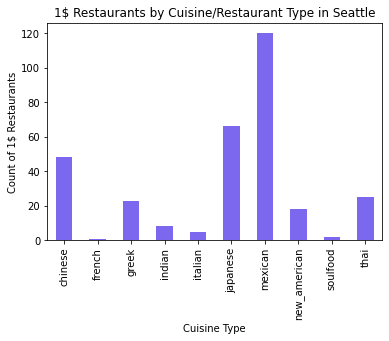

In [127]:
bar_plot = seattle_price_df[seattle_price_df["price_int"]==1].groupby("ethnicity").count()["price"].plot(kind='bar', color='mediumslateblue')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Cuisine Type")
bar_plot.set_title("1$ Restaurants by Cuisine/Restaurant Type in Seattle")
plt.savefig("./Output/Charts/Seattle_Ethnic_1$_Bar.png")

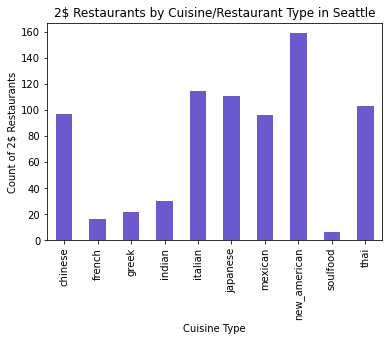

In [126]:
bar_plot2 = seattle_price_df[seattle_price_df["price_int"]==2].groupby("ethnicity").count()["price"].plot(kind='bar', color='slateblue')
bar_plot2.set_ylabel("Count of 2$ Restaurants")
bar_plot2.set_xlabel("Cuisine Type")
bar_plot2.set_title("2$ Restaurants by Cuisine/Restaurant Type in Seattle")
plt.savefig("./Output/Charts/Seattle_Ethnic_2$_Bar.png")

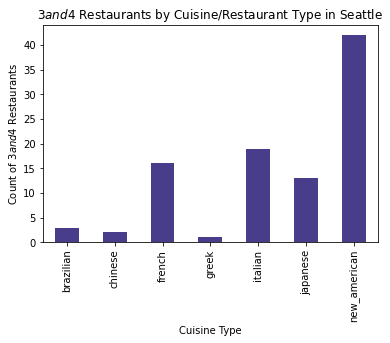

In [125]:
bar_plot3 = seattle_price_df[(seattle_price_df["price_int"]==3)|(seattle_price_df["price_int"]==4)].groupby("ethnicity").count()["price"].plot(kind='bar', color='darkslateblue')
bar_plot3.set_ylabel("Count of 3$ and 4$ Restaurants")
bar_plot3.set_xlabel("Cuisine Type")
bar_plot3.set_title("3$ and 4$ Restaurants by Cuisine/Restaurant Type in Seattle")
plt.savefig("./Output/Charts/Seattle_Ethnic_3$4$_Bar.png")

In [61]:
# bar_plot = seattle_price_df.groupby("ethnicity")["price_int"].value_counts().plot(kind='bar') 
# bar_plot.set_xlabel = ("Ethnicity & Pricepoint")
# bar_plot.set_ylabel =("Count")
# bar_plot.set_title = ("Breakdown of Restaurant Ethnicity by Pricepoint - Seattle")
# #plt.savefig("./Output/Charts/Seattle_Ethnic_Price_Bar.png")
# plt.show()

In [64]:
seattle_rating_price = seattle_price_df.groupby("rating")["price"].value_counts()
# seattle_rating_price

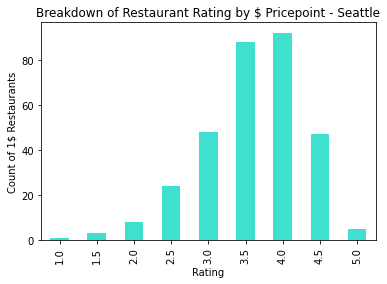

In [107]:
bar_plot = seattle_price_df[seattle_price_df["price_int"]==1].groupby("rating").count()["price"].plot(kind='bar', color='turquoise')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Rating")
bar_plot.set_title("Breakdown of Restaurant Rating by $ Pricepoint - Seattle")
plt.savefig("./Output/Charts/seattle_Rating_$_Bar.png")

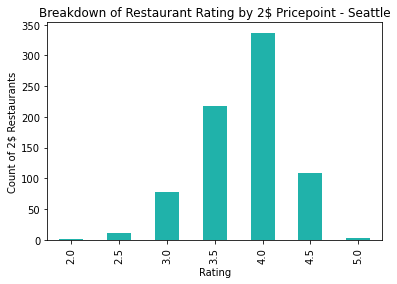

In [108]:
bar_plot2 = seattle_price_df[seattle_price_df["price_int"]==2].groupby("rating").count()["price"].plot(kind='bar', color='lightseagreen')
bar_plot2.set_ylabel("Count of 2$ Restaurants")
bar_plot2.set_xlabel("Rating")
bar_plot2.set_title("Breakdown of Restaurant Rating by 2$ Pricepoint - Seattle")
plt.savefig("./Output/Charts/seattle_Rating_2$_Bar.png")

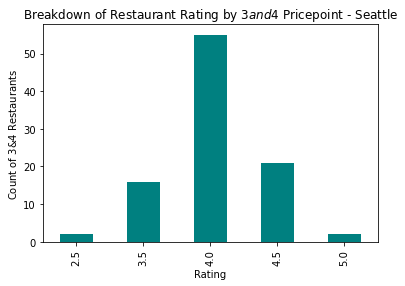

In [109]:
bar_plot3 = seattle_price_df[(seattle_price_df["price_int"]==3)|(seattle_price_df["price_int"]==4)].groupby("rating").count()["price"].plot(kind='bar', color='teal')
bar_plot3.set_ylabel("Count of 3$ & 4$ Restaurants")
bar_plot3.set_xlabel("Rating")
bar_plot3.set_title("Breakdown of Restaurant Rating by 3$ and 4$ Pricepoint - Seattle")
plt.savefig("./Output/Charts/Seattle_Rating_3$4$_Bar.png")

In [67]:
# seattle_price_df.groupby("rating")["price_int"].value_counts().plot(kind='bar') 
# plt.xlabel =("Rating & Pricepoint")
# plt.ylabel =("Count")
# plt.title =("Breakdown of Restaurant Rating by Pricepoint - Seattle")
# #plt.savefig("./Output/Charts/Seattle_Rating_Price_Bar.png")
# plt.show()

In [57]:
# Configure gmaps
gmaps.configure(api_key=google_key)

figure_layout = {
    'width': '600px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

# create variables for heatmap
locations = seattle_price_df[["latitude", "longitude"]]
price = seattle_price_df["price_int"].astype(float)
#maxprice = price_int.max()

#dallas_center = (32.779167, -96.808891)
seattle_center = (47.608013, -122.335167)
fig = gmaps.figure(layout=figure_layout, center=seattle_center, zoom_level=5)

# create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=True, point_radius=5)

# add layer
fig.add_layer(heat_layer)

# display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='600px'))

# Indianapolis

In [47]:
indianapolis_yelp_path = "./Output/Data/indianapolis_restaurants.csv"
indianapolis_yelp = pd.read_csv(indianapolis_yelp_path)
indianapolis_yelp.head()

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Asian Snack,indianapolis,39.820046,-86.228305,46222,chinese,$,4.5
1,Hong Kong China Restaurant,indianapolis,39.787680,-86.159940,46202,chinese,$,3.5
2,General Tso Inn,indianapolis,39.758240,-86.114960,46203,chinese,$,4.0
3,Fei Da,indianapolis,39.788189,-86.208588,46222,chinese,$,4.0
4,Asian Harbor,indianapolis,39.774140,-86.161667,46204,chinese,$$,3.5


In [48]:
indianapolis_ethnicity_sums = indianapolis_yelp["ethnicity"].value_counts()
# indianapolis_ethnicity_sums

mexican         224
new_american     68
chinese          65
italian          58
indian           18
soulfood         18
japanese         16
thai             14
greek            12
french            9
brazilian         5
Name: ethnicity, dtype: int64

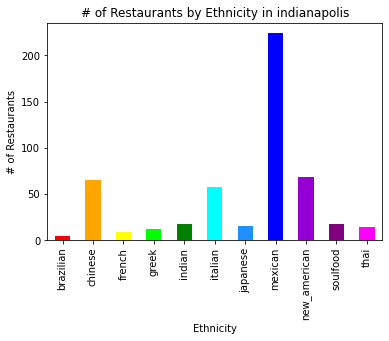

<Figure size 864x432 with 0 Axes>

In [137]:
indy_ethnic_groups = indianapolis_yelp.groupby("ethnicity")
indy_ethnic_counts = indy_ethnic_groups['ethnicity'].count()
indianapolis_ethnic_bar = indy_ethnic_counts.plot(kind='bar', color=ethnicity_colors)
indianapolis_ethnic_bar.set_title("# of Restaurants by Ethnicity in indianapolis")
indianapolis_ethnic_bar.set_xlabel("Ethnicity")
indianapolis_ethnic_bar.set_ylabel("# of Restaurants")
plt.savefig("./Output/Charts/IndianapolisYelpBar.png")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [50]:
indy_price_df = pd.DataFrame(indianapolis_yelp.dropna(subset=['price']))
indy_price_df['price_int'] = [len(price) for price in indy_price_df['price']]
indy_price_df

,name,city,latitude,longitude,zipcode,ethnicity,price,rating,price_int
0,Asian Snack,indianapolis,39.820046,-86.228305,46222,chinese,$,4.5,1
1,Hong Kong China Restaurant,indianapolis,39.787680,-86.159940,46202,chinese,$,3.5,1
2,General Tso Inn,indianapolis,39.758240,-86.114960,46203,chinese,$,4.0,1
3,Fei Da,indianapolis,39.788189,-86.208588,46222,chinese,$,4.0,1
4,Asian Harbor,indianapolis,39.774140,-86.161667,46204,chinese,$$,3.5,2
...,...,...,...,...,...,...,...,...,...
501,Taco Bell,indianapolis,39.854890,-86.240240,46254,mexican,$,1.5,1
502,Taco Bell,indianapolis,39.905167,-86.059453,46250,mexican,$,2.0,1
503,Chipotle Mexican Grill,indianapolis,39.905766,-86.077454,46250,mexican,$,2.5,1
504,Taco Bell,indianapolis,39.709099,-86.082211,46203,mexican,$,2.0,1


In [63]:
indy_ethnic_price = indy_price_df.groupby("ethnicity")["price"].value_counts()
#indy_ethnic_price

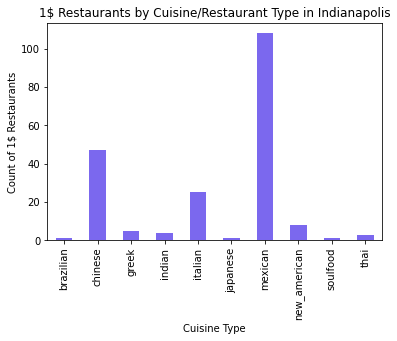

In [123]:
bar_plot = indy_price_df[indy_price_df["price_int"]==1].groupby("ethnicity").count()["price"].plot(kind='bar', color='mediumslateblue')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Cuisine Type")
bar_plot.set_title("1$ Restaurants by Cuisine/Restaurant Type in Indianapolis")
plt.savefig("./Output/Charts/indy_Ethnic_1$_Bar.png")

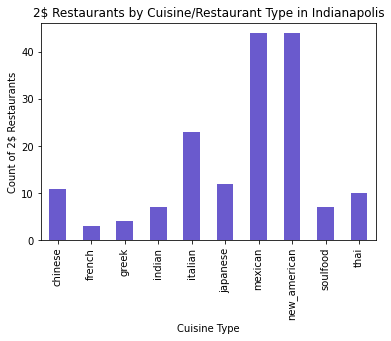

In [124]:
bar_plot2 = indy_price_df[indy_price_df["price_int"]==2].groupby("ethnicity").count()["price"].plot(kind='bar', color='slateblue')
bar_plot2.set_ylabel("Count of 2$ Restaurants")
bar_plot2.set_xlabel("Cuisine Type")
bar_plot2.set_title("2$ Restaurants by Cuisine/Restaurant Type in Indianapolis")
plt.savefig("./Output/Charts/Indy_Ethnic_2$_Bar.png")

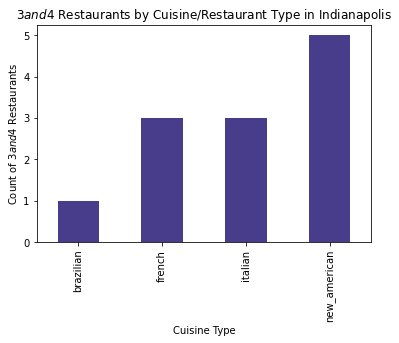

In [122]:
bar_plot3 = indy_price_df[(indy_price_df["price_int"]==3)|(indy_price_df["price_int"]==4)].groupby("ethnicity").count()["price"].plot(kind='bar', color='darkslateblue')
bar_plot3.set_ylabel("Count of 3$ and 4$ Restaurants")
bar_plot3.set_xlabel("Cuisine Type")
bar_plot3.set_title("3$ and 4$ Restaurants by Cuisine/Restaurant Type in Indianapolis")
plt.savefig("./Output/Charts/Indy_Ethnic_3$4$_Bar.png")

In [66]:
# indy_price_df.groupby("ethnicity")["price_int"].value_counts().plot(kind='bar') 
# plt.xlabel =("Ethnicity & Pricepoint")
# plt.ylabel =("Count")
# plt.title =("Breakdown of Restaurant Ethnicity by Pricepoint - Indianapolis")
# #plt.savefig("./Output/Charts/Indianapolis_Ethnic_Price_Bar.png")
# plt.show()

In [62]:
indy_rating_price = indy_price_df.groupby("rating")["price"].value_counts()
#indy_rating_price

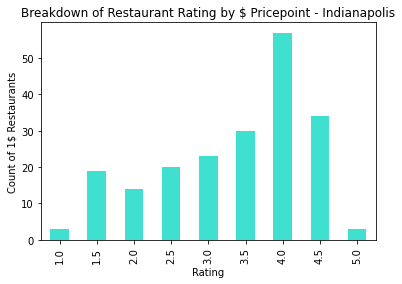

In [110]:
bar_plot = indy_price_df[indy_price_df["price_int"]==1].groupby("rating").count()["price"].plot(kind='bar', color='turquoise')
bar_plot.set_ylabel("Count of 1$ Restaurants")
bar_plot.set_xlabel("Rating")
bar_plot.set_title("Breakdown of Restaurant Rating by $ Pricepoint - Indianapolis")
plt.savefig("./Output/Charts/Indy_Rating_1$_Bar.png")

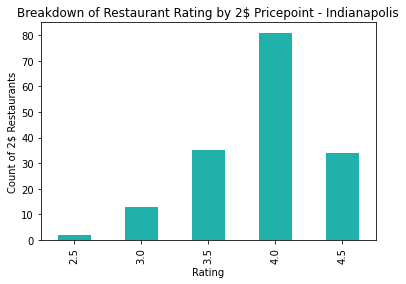

In [111]:
bar_plot2 = indy_price_df[indy_price_df["price_int"]==2].groupby("rating").count()["price"].plot(kind='bar', color='lightseagreen')
bar_plot2.set_ylabel("Count of 2$ Restaurants")
bar_plot2.set_xlabel("Rating")
bar_plot2.set_title("Breakdown of Restaurant Rating by 2$ Pricepoint - Indianapolis")
plt.savefig("./Output/Charts/Indy_Rating_2$_Bar.png")

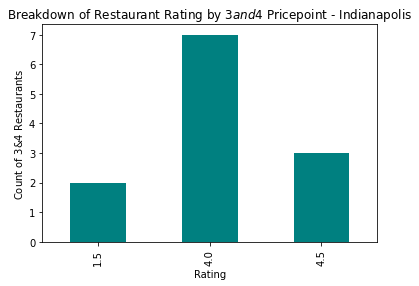

In [112]:
bar_plot3 = indy_price_df[(indy_price_df["price_int"]==3)|(indy_price_df["price_int"]==4)].groupby("rating").count()["price"].plot(kind='bar', color='teal')
bar_plot3.set_ylabel("Count of 3$ & 4$ Restaurants")
bar_plot3.set_xlabel("Rating")
bar_plot3.set_title("Breakdown of Restaurant Rating by 3$ and 4$ Pricepoint - Indianapolis")
plt.savefig("./Output/Charts/Indy_Rating_3$4$_Bar.png")

In [65]:
# indy_price_df.groupby("rating")["price_int"].value_counts().plot(kind='bar') 
# plt.xlabel =("Rating & Pricepoint")
# plt.ylabel =("Count")
# plt.title =("Breakdown of Restaurant Ethnicity by Pricepoint - Indianapolis")
# #plt.savefig("./Output/Charts/Indianapolis_Ethnic_Price_Bar.png")
# plt.show()

In [58]:
# Configure gmaps
gmaps.configure(api_key=google_key)

figure_layout = {
    'width': '600px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

# create variables for heatmap
locations = indy_price_df[["latitude", "longitude"]]
price = indy_price_df["price_int"].astype(float)
indy_center = (39.791000, -86.148003)

fig = gmaps.figure(layout=figure_layout, center=indy_center, zoom_level=5)

# create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=True, point_radius=10)

# add layer
fig.add_layer(heat_layer)

# display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='600px'))